In [1]:
import pandas as pd
import numpy as np
from helper_functions import *
import matplotlib.pyplot as plt
plt.style.use('seaborn')
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
import seaborn as sns
from datetime import datetime, date, time, timedelta
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
today = date.today().strftime('%d-%b-%Y')

In [3]:
data_path = '../data/cleaned_data.csv'
df = pd.read_csv(data_path,index_col=[0])

In [4]:
df

,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2
0,"Frodeno, Jan",DEU,Male,MPRO,47.516667,256.033333,162.716667,471.216667,1,1,1,1.966667,2.983333
1,"O'donnell, Tim",USA,Male,MPRO,47.633333,258.183333,169.750000,479.683333,2,2,2,2.016667,2.100000
2,"Kienle, Sebastian",DEU,Male,MPRO,52.283333,255.066667,169.933333,482.066667,3,3,3,2.200000,2.583333
3,"Hoffman, Ben",USA,Male,MPRO,51.016667,264.016667,163.133333,482.866667,4,4,4,2.416667,2.283333
4,"Wurf, Cameron",AUS,Male,MPRO,52.416667,254.733333,175.050000,486.683333,5,5,5,2.116667,2.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,"Beavers, Cathy",USA,Female,F65-69,105.500000,505.016667,378.866667,1010.050000,26,609,2262,10.416667,10.250000
2254,"Whitehouse, Paul",USA,Male,M70-74,126.016667,471.333333,389.566667,1010.066667,28,1654,2263,11.816667,11.333333
2255,"Svoboda-vasquez, Hanna",DEU,Female,F50-54,89.550000,496.450000,407.700000,1011.050000,66,610,2264,9.783333,7.566667
2256,"Piasentini, Edgardo",ARG,Male,M65-69,102.450000,462.150000,433.816667,1013.350000,50,1655,2265,6.283333,8.650000


# EDA

In [5]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

In [6]:
df['Division'].unique()

array(['MPRO', 'M35-39', 'FPRO', 'M30-34', 'M25-29', 'M45-49', 'M40-44',
       'M18-24', 'M50-54', 'F30-34', 'M55-59', 'F25-29', 'F45-49',
       'F50-54', 'F35-39', 'F40-44', 'M60-64', 'F18-24', 'F55-59',
       'M65-69', 'F60-64', 'M70-74', 'F65-69', 'M75-79', 'F70-74',
       'M80-84'], dtype=object)

#### Scatter plots of pro event times by gender

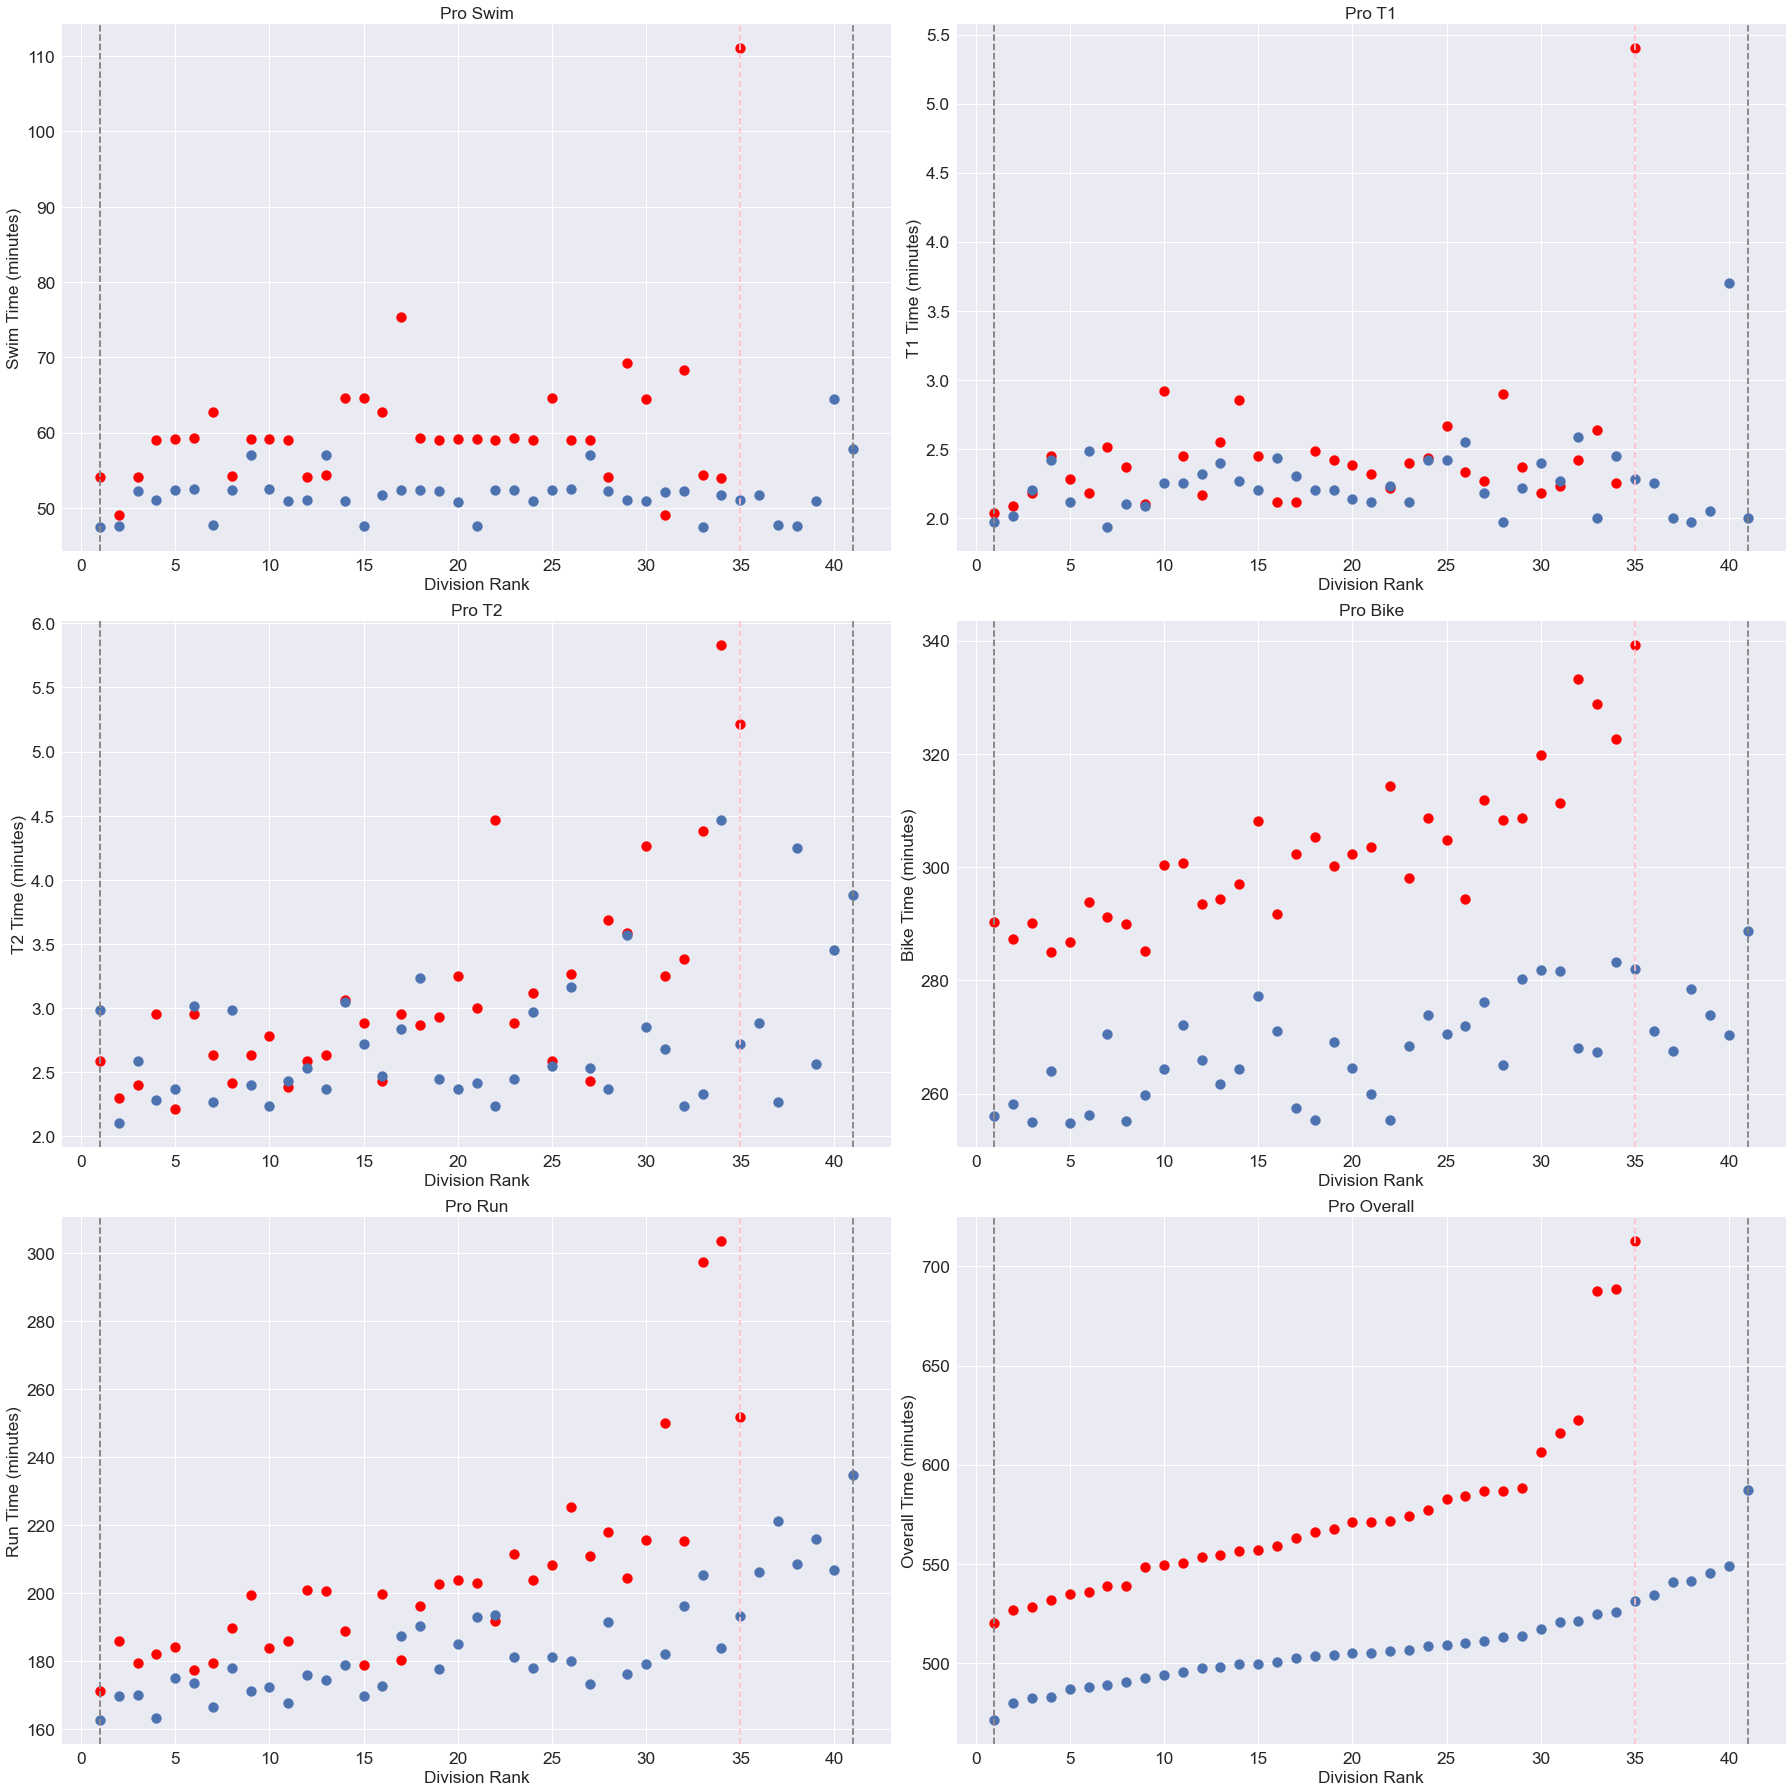

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(25,25))
plot_gender_ranks(axs, df)
plt.tight_layout()
plt.savefig(f'../images/pro-{today}');

#### Scatter plots of amateur event times by gender

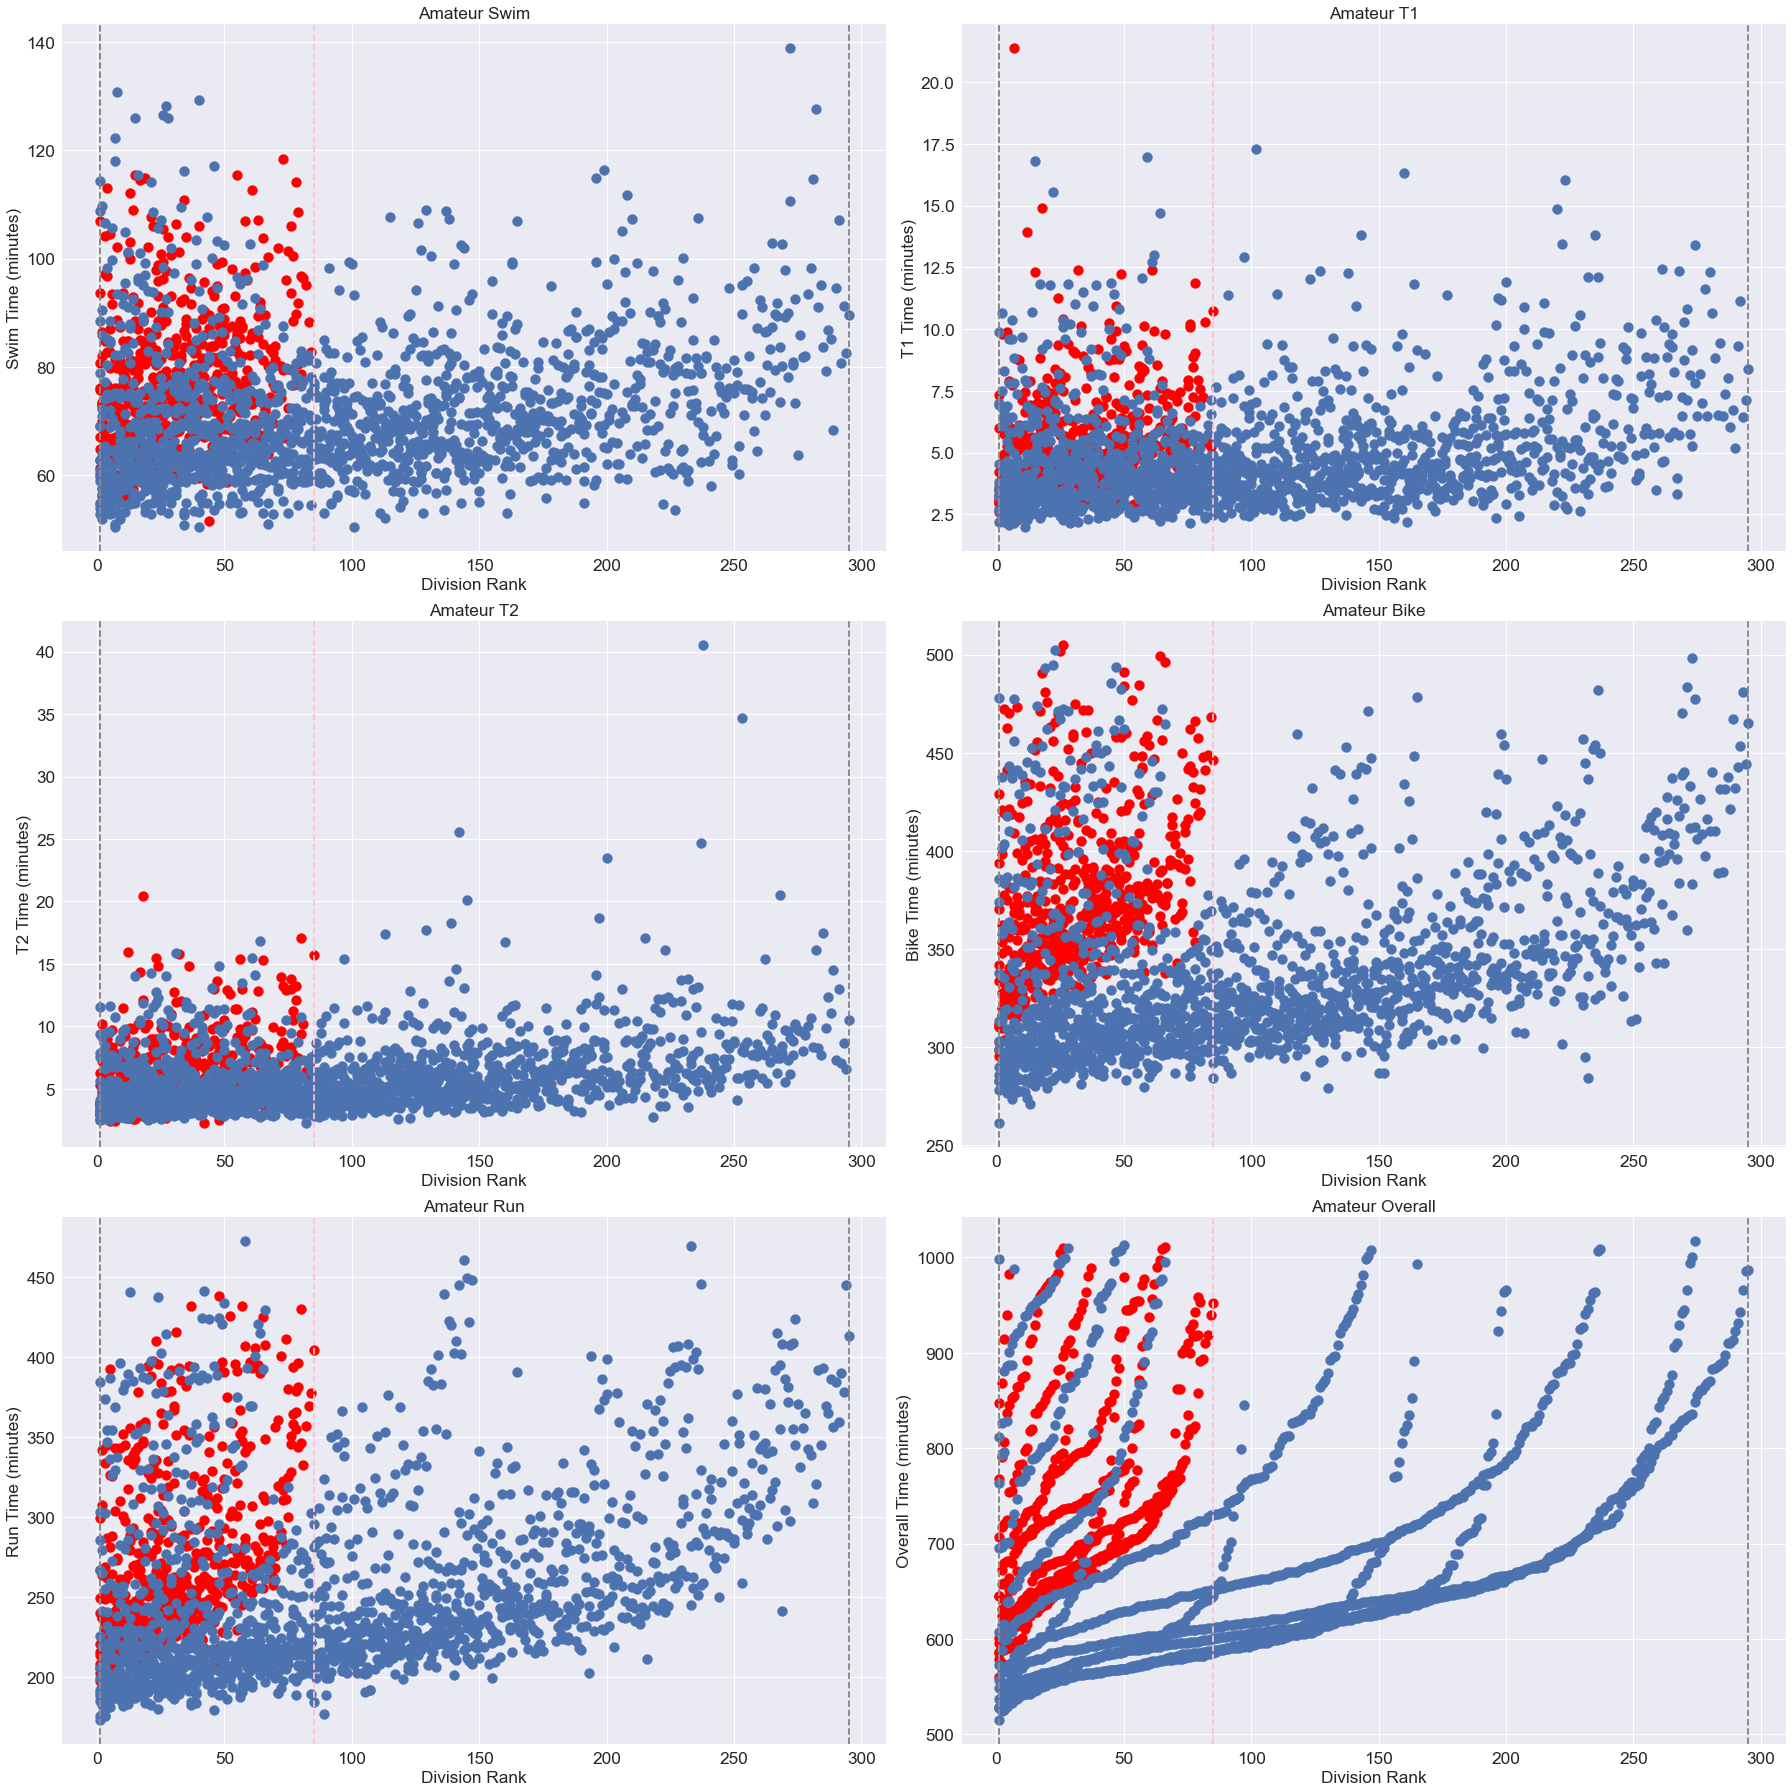

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(25,25))
plot_gender_ranks(axs, df, division='Amateur')
plt.tight_layout()
plt.savefig(f'../images/amateur-{today}');

There are several outliers when looking at the scatter plots of professional times.  ... (explain some thoughts here)

# Do men race faster on average than women?

Based on these scatter plots, it certainly seems so. I will conduct a two-sample, unpaired T-Test since both gender's event times are independent of each other. This test states a null hypothesis and alternative hypothesis as follows:

Null hypothesis: men and women mean race times are equal.

Alternative hypothesis: men and women mean race times are not equal, or one of them races faster on average than the other.

1. Randomly sample with replacement from division's sample.
2. Average times.
3. Plot histogram of means.
4. Define normal distribution.
5. Compare mean differences in normally distributed averages.

In [9]:
sports = ['Swim', 'T1', 'Bike', 'T2', 'Run', 'Overall']

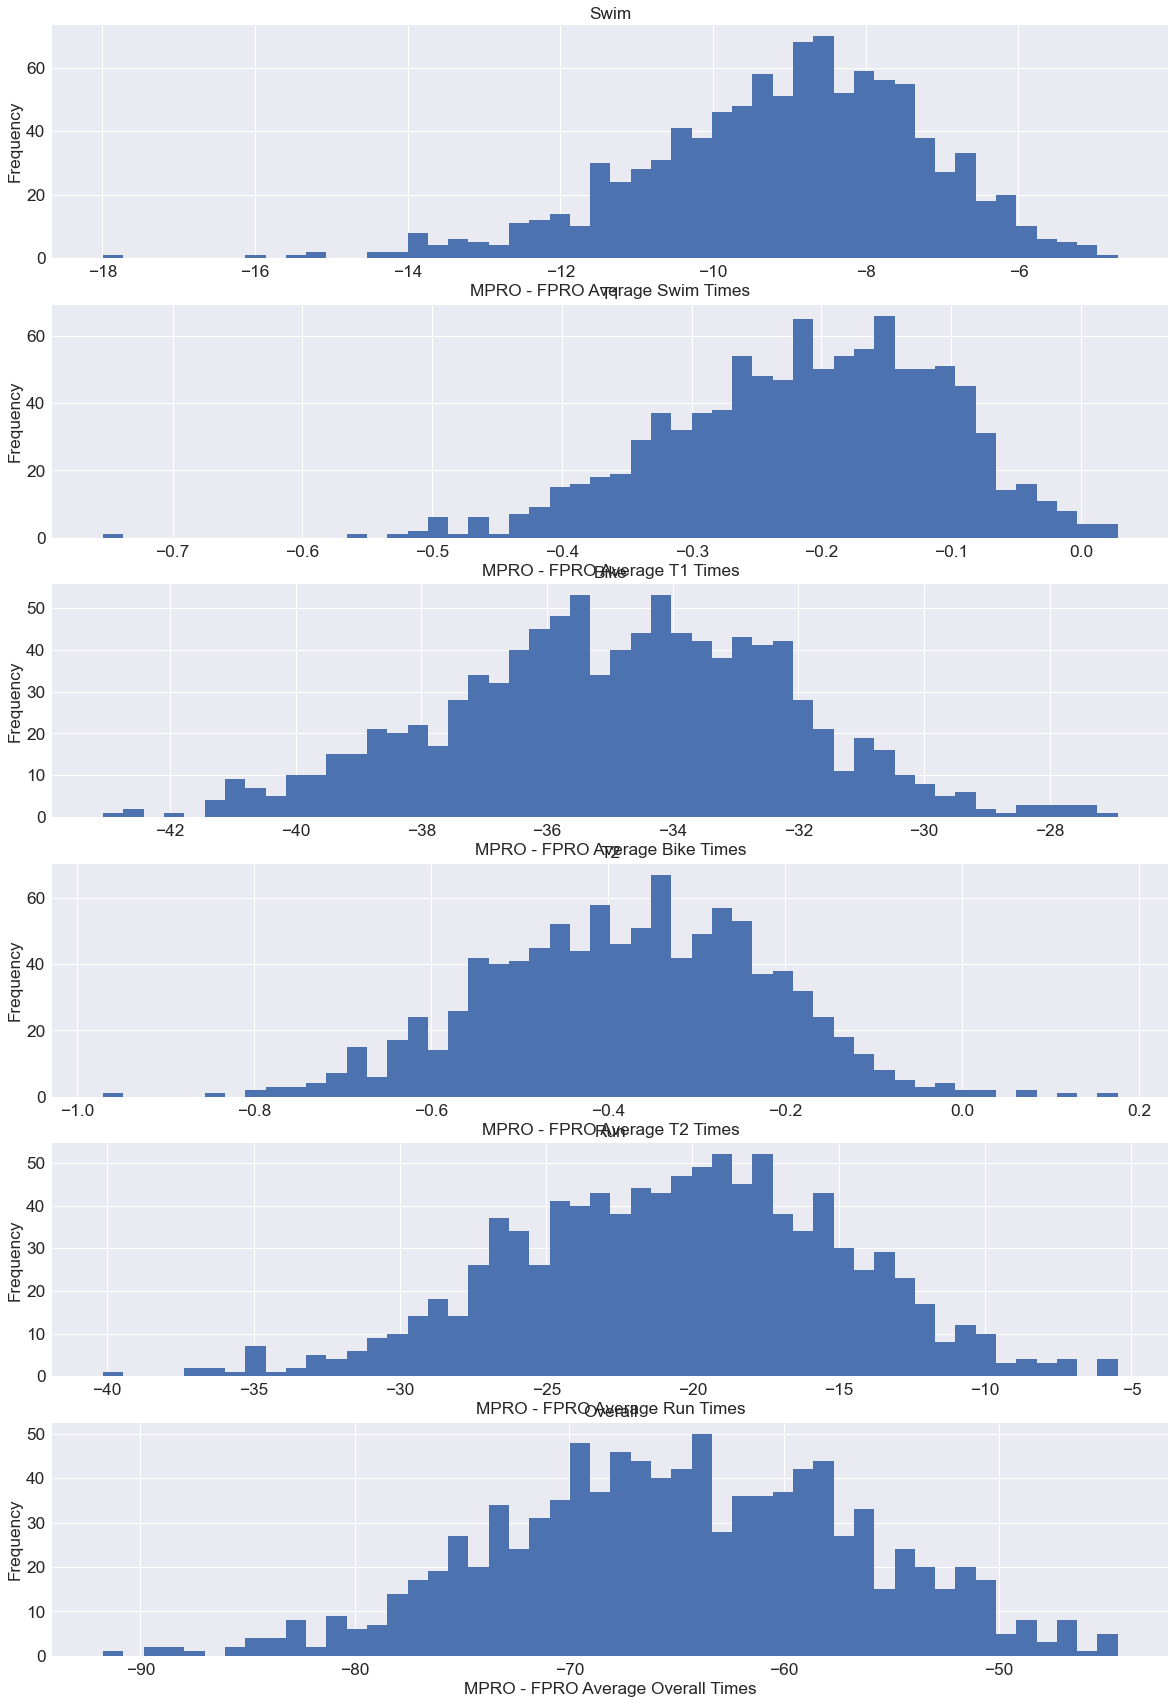

In [10]:
fig, axs = plt.subplots(6, figsize=(20,30))
for sport, ax in zip(sports, axs):
    plot_hist_stats(ax, df, sport, 'MPRO', 'FPRO', 1000, np.mean)
plt.tight_layout
plt.savefig(f'../images/mpro-fpro-{today}');

In [11]:
t_statistic, pvalue = ttest_ind(df[df['Division']=='MPRO']['Overall'], df[df['Division']=='FPRO']['Overall'], equal_var=False)
print(f'Pro t-test statistic: {round(t_statistic,2)}')
print(f'Pro p-value: {round(pvalue, 4)}')

Pro t-test statistic: -7.76
Pro p-value: 0.0


In [12]:
t_statistic, pvalue = ttest_ind(df[df['Division']!='MPRO']['Overall'], df[df['Division']!='FPRO']['Overall'], equal_var=False)
print(f'Amateur t-test statistic: {round(t_statistic,2)}')
print(f'Amateur p-value: {round(pvalue,2)}')

Amateur t-test statistic: 0.45
Amateur p-value: 0.65


# What correlation do event times have with ranking?

In [13]:
heatmap_cols = ['Swim', 'T1', 'Bike', 'T2', 'Run', 'Overall', 'Gender', 'Division Rank']
heat_df = df[heatmap_cols]

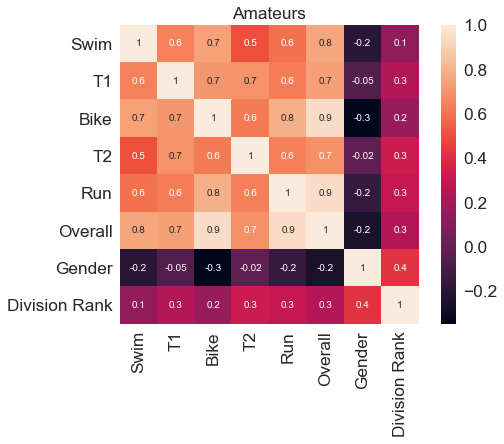

In [14]:
sns.heatmap(heat_df.corr(), annot = True, fmt='.1g', square=True)
plt.title('Amateurs')
plt.savefig('../images/amateurheatmap.png');

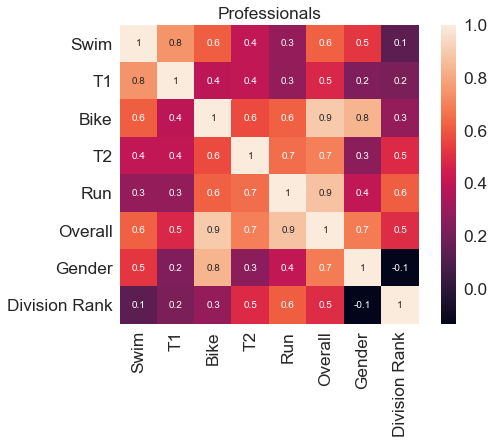

In [15]:
pro_mask = (df['Division'] == 'MPRO') | (df['Division'] == 'FPRO')
heat_pros = df[pro_mask].copy()
heat_pros['Gender'] = (df['Division'] == "FPRO")
heat_pros['Gender'].astype(int)
plot = heat_pros[heatmap_cols]
sns.heatmap(plot.corr(), annot = True, fmt='.1g', square=True)
plt.title('Professionals')
plt.savefig('../images/proheatmap.png');

# How many amateurs are racing like pros?

I'm looking to bootstrap the lower 90th percentile of pro event times, and compare those to the bootstrapped 10th percentile of amateur event times. Bootstrapping will allow me to generalize to a larger population of professional/amateur ironman triathletes, not just the athletes represented in Kona.

Female PRO Overall Times Bootstrap CI 90th Percentile (minutes): [586.9, 688.37]
Male PRO Overall Times Bootstrap CI90th Percentile (minutes): [524.48, 545.48]


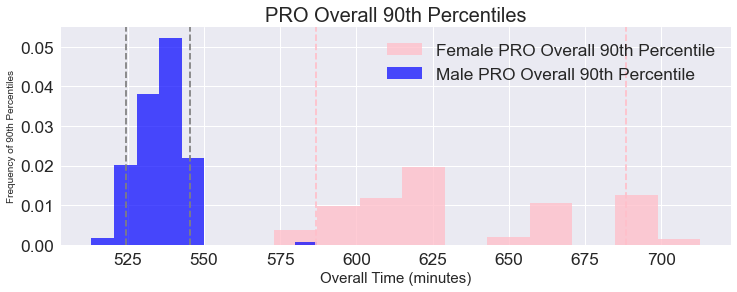

In [16]:
fig, ax, overall_CIf_pro, overall_CIm_pro = plot_percentile('Overall', df, 'PRO', percentile=90);

Female PRO Overall Times Bootstrap CI 90th Percentile (minutes): [586.9, 688.13]
Male PRO Overall Times Bootstrap CI90th Percentile (minutes): [524.48, 545.48]


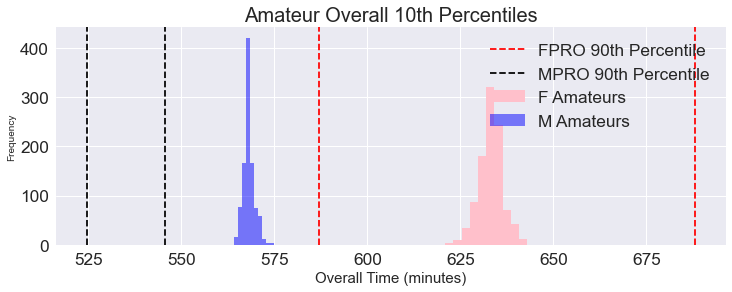

In [17]:
plot_fastamateurs('Overall', df)
plt.savefig('test.png');

Female PRO Swim Times Bootstrap CI 90th Percentile (minutes): [63.83, 75.4]
Male PRO Swim Times Bootstrap CI90th Percentile (minutes): [52.42, 57.83]
Female PRO T1 Times Bootstrap CI 90th Percentile (minutes): [2.5, 2.91]
Male PRO T1 Times Bootstrap CI90th Percentile (minutes): [2.42, 2.55]
Female PRO Bike Times Bootstrap CI 90th Percentile (minutes): [310.57, 331.46]
Male PRO Bike Times Bootstrap CI90th Percentile (minutes): [273.95, 283.17]
Female PRO T2 Times Bootstrap CI 90th Percentile (minutes): [3.38, 4.92]
Male PRO T2 Times Bootstrap CI90th Percentile (minutes): [3.02, 3.9]
Female PRO Run Times Bootstrap CI 90th Percentile (minutes): [213.72, 297.6]
Male PRO Run Times Bootstrap CI90th Percentile (minutes): [193.7, 216.03]
Female PRO Overall Times Bootstrap CI 90th Percentile (minutes): [586.72, 688.37]
Male PRO Overall Times Bootstrap CI90th Percentile (minutes): [524.48, 545.48]


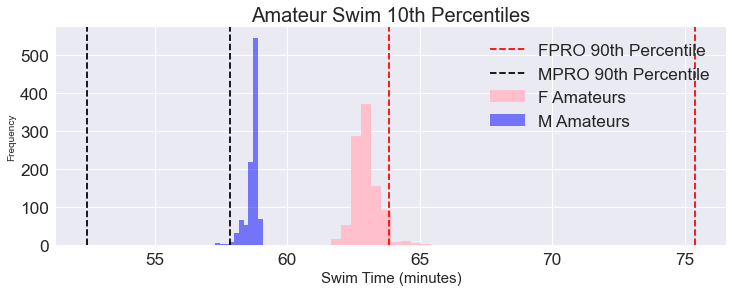

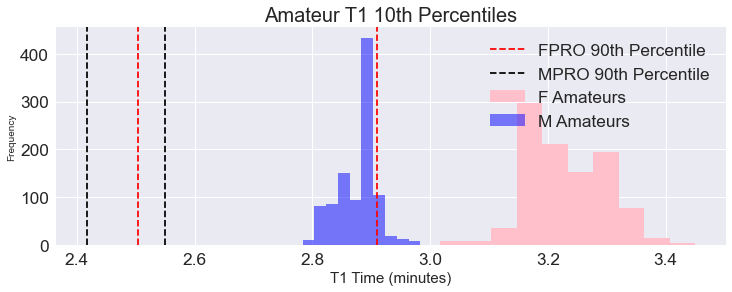

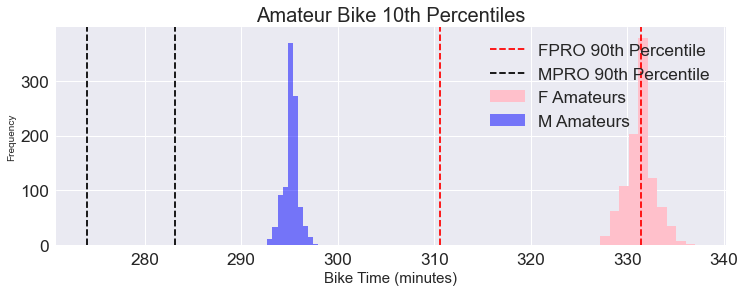

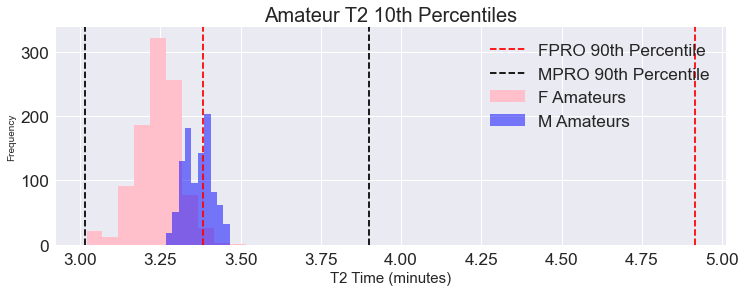

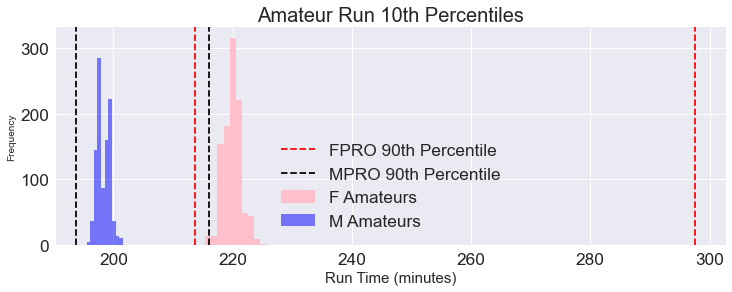

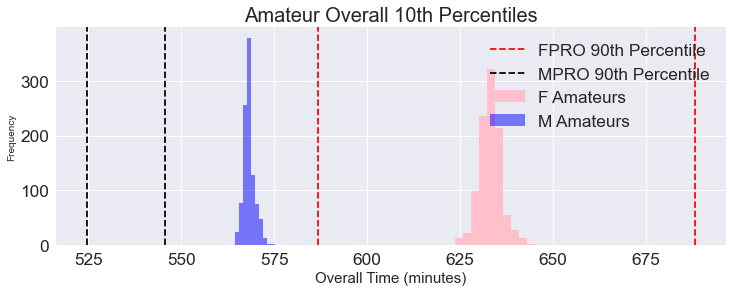

In [18]:
for sport in sports:
    plot_fastamateurs(sport, df)
    plt.savefig(f'../images/{sport}_comparison.png');

# Better: Bootstrap 10th percentile of amateur times and compare to pro's 90th percentile

In [24]:
def plot_cis(sport, df1=fem_agegroups, df2=male_agegroups, df3=fem_pro, df4=male_pro):    
    # Bootstrap amateur 10th percentiles
    fem_10 = bootstrap_percentile(df1, sport, 1000, 10)
    male_10 = bootstrap_percentile(df2, sport, 1000, 10)
    
    # Say it with confidence
    left_f10 = np.percentile(fem_10, 2.5)
    right_f10 = np.percentile(fem_10, 97.5)
    left_m10 = np.percentile(male_10, 2.5)
    right_m10 = np.percentile(male_10, 97.5)
    
    # Generate pro bootstrap 90th percentiles
    fem_90 = bootstrap_percentile(df3, sport, 1000, 90)
    male_90 = bootstrap_percentile(df4, sport, 1000, 90)
    
    # Say it with confidence
    left_f90 = np.percentile(fem_90, 2.5)
    right_f90 = np.percentile(fem_90, 97.5)
    left_m90 = np.percentile(male_90, 2.5)
    right_m90 = np.percentile(male_90, 97.5)
    
    # Plot it
    fig, ax = plt.subplots(1, figsize=(12,4))
    
    ax.hist(male_10, bins=100, density=True, color='grey', alpha=0.75, label=f'Male Amateur {sport} 10 Percentiles')
    ax.hist(fem_10, bins=100, density=True, color='pink', alpha=0.75, label=f'Female Amateur {sport} 10 Percentiles')
    ax.axvline(left_f90, c='red', linestyle="--", label='Female Pro 90 Percentile')
    ax.axvline(right_f90, c='red', linestyle="--")
    ax.axvline(left_m90, c='black', linestyle="--", label='Male Pro 90 Percentile')
    ax.axvline(right_m90, c='black', linestyle="--")
    ax.legend()

    ax.set_title(f'How does the {sport} Amateur 10th Percentile Compare to the Pro 90th Percentile?', fontsize=20)
    ax.set_xlabel(f'{sport} Time (minutes)', fontsize=15)
    ax.set_ylabel('Frequency', fontsize=15)
    return fig, ax

NameError: name 'fem_agegroups' is not defined

In [ ]:
plot_cis('Swim')


In [ ]:
plot_cis('Bike')


In [ ]:
plot_cis('Run')


In [ ]:
plot_cis('Overall')


This shows me I need to go back and clean out the female pro that is weighing down the values.

# Just who are these fast amateurs?

In [ ]:
# Generate pro bootstrap 90th percentiles
fem_90p = bootstrap_percentile(fem_pro, 'Overall', 1000, 90)
male_90p = bootstrap_percentile(male_pro, 'Overall', 1000, 90)
    
# Say it with confidence
left_f90p = np.percentile(fem_90p, 2.5)
right_f90p = np.percentile(fem_90p, 97.5)

left_m90p = np.percentile(male_90p, 2.5)
right_m90p = np.percentile(male_90p, 97.5)

m = male_agegroups[male_agegroups.Overall <= right_m90p]
f = fem_agegroups[fem_agegroups.Overall <= right_f90p]
sponsor_these_men = m.sort_values('Overall')['Name'].tolist()
sponsor_these_women = f.sort_values('Overall')['Name'].tolist()

print(f'Best Male Amateurs:')
print(' ')
for i in range(len(sponsor_these_men)):
    print(f'{i} {sponsor_these_men[i]}')
print(' ')
print(f'Best Female Amateurs:')
print(' ')
for i in range(int(len(sponsor_these_women)/5)):
    print(f'{i} {sponsor_these_women[i]}')

# Next compare event times to athlete's overall rank

To better see the event time's weight in their correlation with athlete's Overall Rank, I will standardize the timed event columns and plot them against Overall Rank!

Notes:

Athletes in 10 percentile Swim, also perform in 10 percentile Bike, or Run or Overall.
H0: 10% Swim => no better in Overall
    10% Swim - A
    90% Swim - B
Ha: 10% Swim == 10% other events

Standardized MA: standardization - subtract mean from ea. swim row, then divide by std dev
    Do this for all 'time' columns to be able to compare them
    This would change columns to non-dimensional

Bootstrap *mean* times 
Man Whitney U test: non-parametric version of the t-test

Adv.
Are countries surrounded by more water, producing athletes in 10% Swim?


In [ ]:
# Standardize event time columns by subtracting mean and dividing by standard deviation:
df['Norm_Swim'] = ( df['Swim'] - np.mean(df['Swim']) ) / np.std(df['Swim'])
df['Norm_Bike'] = ( df['Bike'] - np.mean(df['Bike']) ) / np.std(df['Bike'])
df['Norm_Run'] = ( df['Run'] - np.mean(df['Run']) ) / np.std(df['Run'])
df['Norm_T1'] = ( df['T1'] - np.mean(df['T1']) ) / np.std(df['T1'])
df['Norm_T2'] = ( df['T2'] - np.mean(df['T2']) ) / np.std(df['T2'])

In [ ]:
def rankvsevent(col1, normalized_sport):
    '''
    Plots athlete's Overall Rank vs. sport time in a bar plot
    '''
    fig, ax = plt.subplots(1, figsize=(12,4))
    
    ax.bar(col1, df[normalized_sport])
    ax.set_title(f'Overall Rank vs. {normalized_sport} Times', fontsize=20)
    ax.set_xlabel(f'Overall Rank', fontsize=15)
    ax.set_ylabel(f'Non Dimensional {normalized_sport} Time')
    return fig, ax

In [ ]:
#rankvsevent(df['Overall Rank'], 'Norm_Swim')

In [ ]:
#rankvsevent(df['Overall Rank'], 'Norm_Bike')

In [ ]:
#rankvsevent(df['Overall Rank'], 'Norm_Run')

In [ ]:
#rankvsevent(df['Overall Rank'], 'Norm_T1')

In [ ]:
#rankvsevent(df['Overall Rank'], 'Norm_T2')

# Do athletes who perform consistent in event times perform better than inconsistent athletes?

In [ ]:
def consistency(row):
    '''
    Returns difference from standardized mean
    '''
    return max(row.Norm_Swim, row.Norm_Run, row.Norm_Bike) - min(row.Norm_Swim, row.Norm_Run, row.Norm_Bike)

In [ ]:
df['Consistency'] = df.apply(consistency, axis=1)

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax.scatter('Overall Rank', 'Consistency', data=df, color = 'crimson')
ax.set_title('Consistency by Overall Rank', fontsize=20)
ax.set_xlabel('Athlete Overall Rank')
ax.set_ylabel('Consistency')
ax.set_xbound(-15, 2200)
ax.set_ybound(-.05)
plt.savefig('consistency.png')

In [ ]:
ax = sns.catplot(x='Division', y='Consistency',  kind='violin', split=True, data=df, 
                 order=['MPRO', 'FPRO', 'M18-24', 'F18-24', 'M25-29', 'F25-29', 'M30-34', 'F30-34', 'M35-39', 'F35-39', 'M40-44', 'F40-44',
                       'M45-49', 'F45-49', 'M50-54', 'F50-54', 'M55-59', 'F55-59', 'M60-64', 'F60-64', 'M65-69', 'F65-69', 'M70-74', 'M75-79'], height=5, aspect=3);
ax.set_xticklabels(rotation=45)
ax.fig.suptitle('Consistencies of Athlete Divisions (by agegroup)', fontsize=20)


# Using standardized event scores, let's explore a specialization metric:

compare consistency between disciplines : specialization metric

Running specialization = average of normalized (swim + bike) - normalized run.

So if a person has a low (fast) run, but a high (slow) swim and bike, their running specialization score would be high.

"is a running specialist more likely to finish in the top 20 of their division than a bike specialist?"

In [ ]:
def specialize(row, discipline):
    '''
    Returns specialize metrics for events (swim, bike, or run)
    Users will need to edit the function to subtract whatever Specialized Metric they are looking for
    specialize('Swim')
    disciplines = [1, 2, 3]
    '''
    if discipline == 'Swim':
        other1 = 'Bike'
        other2 = 'Run'
    elif discipline == 'Bike':
        other1 = 'Swim'
        other2 = 'Run'
    else:
        other1 = 'Bike'
        other2 = 'Swim'
    return row[[f'Norm_{other1}', f'Norm_{other2}']].mean() - row[f'Norm_{discipline}']

In [ ]:
for discipline in ['Swim', 'Bike', 'Run']:
    df[f'Specialize {discipline}'] = df.apply(specialize, args=(discipline,), axis=1)

In [ ]:
df.drop(['Specialize Run', 'Specialize Swim', 'Specialize Bike'], axis=1, inplace=True)

In [ ]:
df

In [ ]:
fem_results = df[df['Gender'] == 'Female']
fem_pro = fem_results[fem_results['Division'] == 'FPRO']
fem_agegroups = fem_results[fem_results['Division'] != 'FPRO']
male_results = df[df['Gender'] == 'Male']
male_pro = male_results[male_results['Division'] == 'MPRO']
male_agegroups = male_results[male_results['Division'] != 'MPRO']

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,4))

ax.scatter(fem_pro['Specialize Swim'], fem_pro['Overall Rank'], color='aqua', label='Swim')
ax.scatter(fem_pro['Specialize Bike'], fem_pro['Overall Rank'], color='crimson', label='Bike')
ax.scatter(fem_pro['Specialize Run'], fem_pro['Overall Rank'], color='violet', label='Run')
ax.set_title('Female Pro Specialization by Rank', fontsize=20)
ax.set_xlabel('Specialization Score', fontsize=12)
ax.set_ylabel('Rank', fontsize=12)
ax.set_xbound(-1.8,)
ax.set_ybound(-5,1000)
ax.legend()


In [ ]:
fig, ax = plt.subplots(1, figsize=(12,4))

ax.scatter(male_pro['Specialize_Swim'], male_pro['Overall Rank'], color='aqua', label='Swim')
ax.scatter( male_pro['Specialize_Bike'], male_pro['Overall Rank'],color='red', label='Bike')
ax.scatter( male_pro['Specialize_Run'], male_pro['Overall Rank'],color='green', label='Run')
ax.set_title('Male Pro Specialization by Rank', fontsize=20)
ax.set_xlabel('Specialization Score', fontsize=12)
ax.set_ylabel('Rank', fontsize=12)
ax.set_xbound(-1,)
ax.set_ybound(-1, 100)
ax.legend()


Notes:

-min & max specialization

-consistency bounds

-how it's done at pro level - present alternative hypothesis for training

-plot specialization surface w/dimension == specialization


-df's sort specialties by descending

-cut them in half

-randomly draw from specialty dfs and compare division rank

In [ ]:
male_div_list = male_agegroups.Division.unique()
fem_div_list = fem_agegroups.Division.unique()
f = np.sort(fem_div_list)
m = np.sort(male_div_list)
f, m

In [ ]:
fig, ax = plt.subplots(len(f), 1, figsize=(12,50))

for i, j in enumerate(f):
    plot_df = fem_results[fem_results['Division'] == f'{j}']

    ax[i].scatter(plot_df['Specialize Swim'], plot_df['Division Rank'], color='aqua', label='Swim')
    ax[i].scatter(plot_df['Specialize Bike'], plot_df['Division Rank'],color='crimson', label='Bike')
    ax[i].scatter(plot_df['Specialize Run'], plot_df['Division Rank'],color='violet', label='Run')
    ax[i].set_title(f'Female {j} Specialization by Rank', fontsize=20)
    ax[i].set_xlabel('Specialization Score', fontsize=12)
    ax[i].set_ylabel('Rank', fontsize=12)
    #ax[i].set_xbound(-1,)
    #ax[i].set_ybound(-1, 100)
    ax[i].legend()
plt.tight_layout()
#plt.savefig('femagegroupspecialization.png')

In [ ]:
fig, ax = plt.subplots(len(m), 1, figsize=(12,50))

for i, j in enumerate(m):
    plot_df = male_results[male_results['Division'] == f'{j}']

    ax[i].scatter(plot_df['Specialize Swim'], plot_df['Division Rank'], color='aqua', label='Swim')
    ax[i].scatter(plot_df['Specialize Bike'], plot_df['Division Rank'],color='red', label='Bike')
    ax[i].scatter(plot_df['Specialize Run'], plot_df['Division Rank'],color='green', label='Run')
    ax[i].set_title(f'Male {j} Specialization by Rank', fontsize=20)
    ax[i].set_xlabel('Specialization Score', fontsize=12)
    ax[i].set_ylabel('Rank', fontsize=12)
    #ax[i].set_xbound(-1,)
    #ax[i].set_ybound(-1, 100)
    ax[i].legend()
plt.tight_layout()
#plt.savefig('maleagegroupspecialization.png')

In [ ]:
def separate_specialized(df, event, threshold):
    '''
    Returns two dataframes
    
    Parameters:
    df: dataframe
    event: string: event in question
    threshold: float: how specialized do you want to make these athletes?
    
    Returns: 
    spec: df of specialized athletes
    non_spec: df of non specialized athletes
    '''
    spec = df.loc[df[f'Specialize {event}'] > threshold]
    non_spec = df.loc[df[f'Specialize {event}'] < threshold]
    return spec, non_spec

In [ ]:
spec_swim, non_spec_swim = separate_specialized(df, 'Swim', 0)
spec_bike, non_spec_bike = separate_specialized(df, 'Bike', 0)
spec_run, non_spec_run = separate_specialized(df, 'Run', 0)

In [ ]:
t_statistic, pvalue = stats.ttest_ind(spec_bike['Overall'], non_spec_bike['Overall'], equal_var=False)
print(f'T-test statistic: {round(t_statistic,2)}')
print(f'P-value: {pvalue}')

In [ ]:
t_statistic, pvalue = stats.ttest_ind(spec_run['Overall'], non_spec_run['Overall'], equal_var=False)
print(f'T-test statistic: {round(t_statistic,2)}')
print(f'P-value: {pvalue}')

In [ ]:
t_statistic, pvalue = stats.ttest_ind(spec_swim['Overall'], non_spec_swim['Overall'], equal_var=False)
print(f'T-test statistic: {round(t_statistic,2)}')
print(f'P-value: {pvalue}')